In [3]:
import os
import io
import xarray as xr
import numpy as np
import gsw
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as image
from mpl_toolkits.mplot3d import Axes3D
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

ds_grd = xr.open_dataset('../data/external/stcc_roms_grid_osu_subset1.nc')
ds_data = xr.open_dataset('../data/external/stcc_his_osu_subset_0001.nc')

# Plot the Entire Surface Field

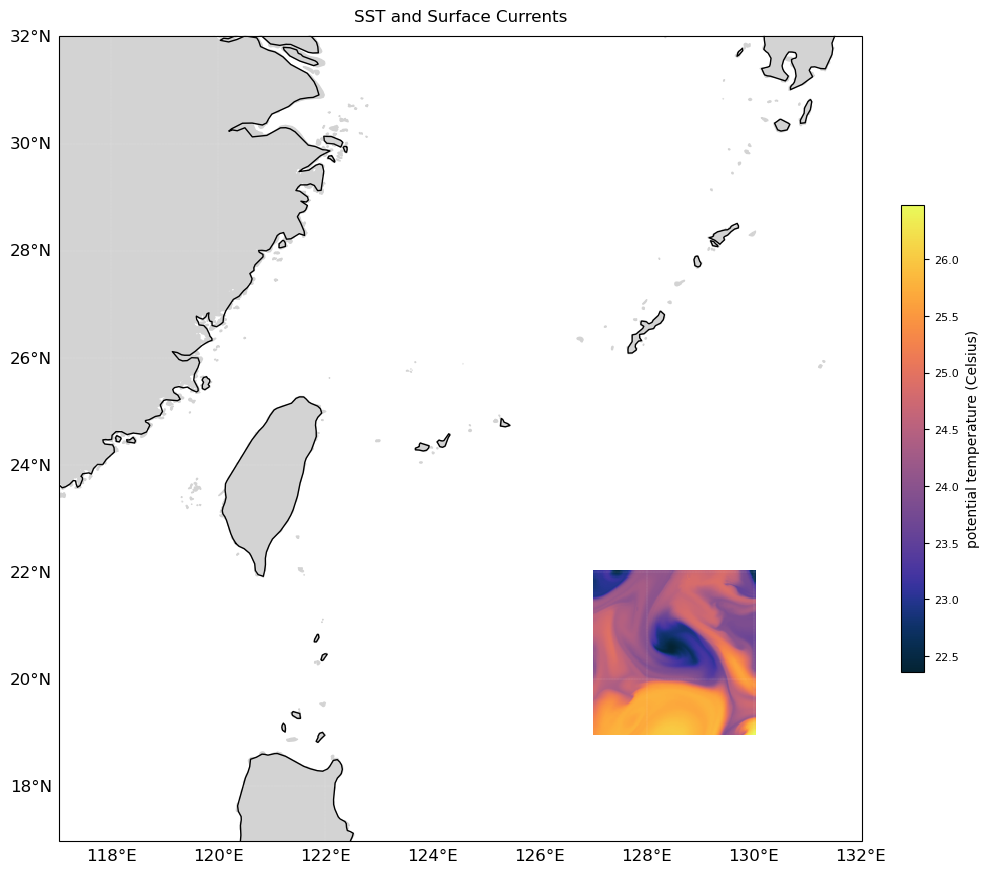

<Figure size 640x480 with 0 Axes>

In [20]:
min_lon_fld = np.min(ds_grd.lon_rho.values)
max_lon_fld = np.max(ds_grd.lon_rho.values)
min_lat_fld = np.min(ds_grd.lat_rho.values)
max_lat_fld = np.max(ds_grd.lat_rho.values)


# Figure size
size = (10, 10)

# Color from cmocean
color = cmocean.cm.thermal

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())

# and extent
ax.set_extent([min_lon_fld-10, max_lon_fld+2, min_lat_fld-2, max_lat_fld+10], ccrs.PlateCarree())

# Plotting using Matplotlib 
# We plot the variable at the surface at the initial recorded time interval
X = ds_grd.lon_u
Y = ds_grd.lat_u
U = ds_data.u.isel(ocean_time = 0, s_rho=49).values
V = ds_data.v.isel(ocean_time = 0, s_rho=49).values


Ux, Uy = np.gradient(U)
Vx, Vy = np.gradient(V)
Ux = Ux[0:-1,:]
Uy = Uy[0:-1,:]
Vx = Vx[:,0:-1]
Vy = Vy[:,0:-1]
V = V[:,0:-1]
U = U[0:-1,:]



cf = plt.pcolor(ds_grd.lon_rho, ds_grd.lat_rho, ds_data.temp.isel(ocean_time=0,s_rho=49).values,transform=ccrs.PlateCarree(), 
              cmap=color)#,vmin = 28, vmax = 30.5)#, add_colorbar=False)
# cf = plt.pcolor(X[0:-1,:], Y[0:-1,:], -(Ux+Vy),transform=ccrs.PlateCarree(), 
#               cmap=color, vmin = -.15, vmax = .15)#, add_colorbar=False)

# Reduce the number of quiver arrows
step = 10
X_reduced = X[::step, ::step]
Y_reduced = Y[::step, ::step]
U_reduced = U[::step, ::step]
V_reduced = V[::step, ::step]


#quiver = plt.quiver(X_reduced, Y_reduced, U_reduced, V_reduced,
#                    transform=ccrs.PlateCarree(), scale=5, color = 'w')      

# Vector options declaration
veclength = 0.5
maxstr = '%3.1f m/s' % veclength
# qk = ax.quiverkey(quiver,1.1,0.95,veclength,maxstr,labelpos='S', 
#               coordinates='axes', color = 'k').set_zorder(11)
# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, orientation="vertical")
cbar.set_label(ds_data.temp.long_name+' ('+ds_data.temp.units+')', rotation=90,
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
plt.title('SST and Surface Currents',
          fontsize=12)
         

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='w', alpha=1,
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                           edgecolor='face', 
                                           facecolor='lightgray'))
ax.coastlines(linewidth=1)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()

# Plot a Latitudinal Section Plot

/var/folders/yg/2tl9pgqn48v6425cz3w7k4lw0000gp/T/ipykernel_21043/2434601824.py:14: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  seclat = plt.pcolor(lat[25:-1,:], ZZ[25:-1], TTT[25:-1,:], cmap = colort, vmin = 18, vmax = 26)


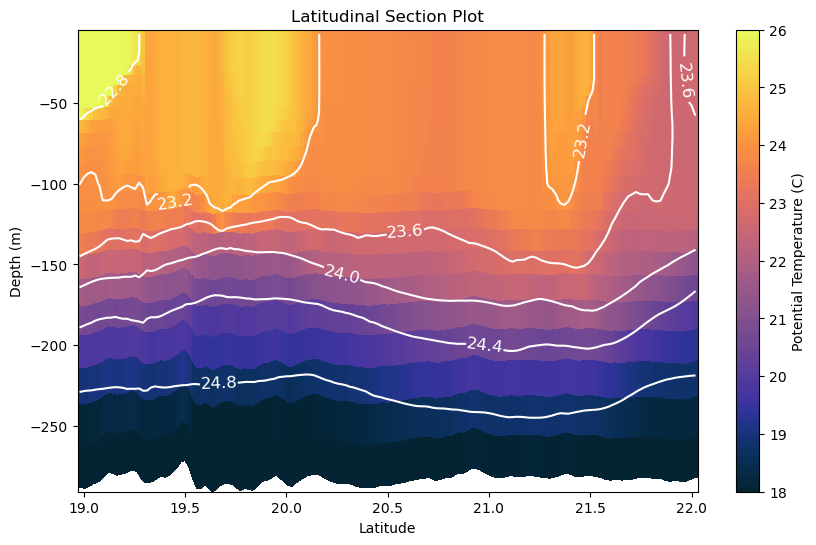

In [5]:
# Color from cmocean
colort = cmocean.cm.thermal
coloru = cmocean.cm.balance
ZZ = ds_grd.z_rho.sel(xi_rho = np.max(ds_grd.xi_rho))
YY = ds_grd.lat_rho.sel(xi_rho = np.max(ds_grd.xi_rho))
lat, dep = np.meshgrid(YY, ds_data.s_rho)
TTT = ds_data.temp.isel(ocean_time = 0, xi_rho = np.max(ds_grd.xi_rho))
SSS = ds_data.salt.isel(ocean_time = 0, xi_rho = np.max(ds_grd.xi_rho))

sig0 = gsw.sigma0(SSS,TTT)

#UUU= ds_data_clip.u.isel(ocean_time = 0, xi_u = np.max(ds_grd_clip.xi_u))
plt.figure(figsize=(10,6))
seclat = plt.pcolor(lat[25:-1,:], ZZ[25:-1], TTT[25:-1,:], cmap = colort, vmin = 18, vmax = 26)

contours = plt.contour(lat[25:-1,:], ZZ[25:-1], sig0[25:-1,:], colors='w')
plt.clabel(contours, inline=True, fontsize=12)
#seclat_RGB = seclat_col.reshape((rows,cols,4))

plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.title('Latitudinal Section Plot')
#plt.gca().invert_yaxis()
plt.colorbar(seclat, label = 'Potential Temperature (C)')

plt.show()

# Select the Area of Interest (AOI), and clip the data

In [7]:
min_lon = 129   # lower left longitude
min_lat = 19     # lower left latitude
max_lon = 130    # upper right longitude
max_lat = 20     # upper right latitude
max_dep = np.min(ZZ[25:-1])

def find_closest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

# Defining the boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

# ds_grd = grid
# ds_data = ds

cval_lonmin = find_closest(ds_grd.lon_rho.values[0,:],min_lon)
cval_lonmax= find_closest(ds_grd.lon_rho.values[0,:],max_lon)
cval_latmin = find_closest(ds_grd.lat_rho.values[:,0],min_lat)
cval_latmax = find_closest(ds_grd.lat_rho.values[:,0],max_lat)

lon_idx_bnds = [cval_lonmin, cval_lonmax]
lat_idx_bnds = [cval_latmin, cval_latmax]
#miny = ds_grd.y(np.where(ds_grd.lon.values >=13))[0]

# Performing the reduction over all the dimensions except "ocean_time"
ds_grd_clip = ds_grd.sel(xi_rho=slice(*lon_idx_bnds), eta_rho=slice(*lat_idx_bnds))
ds_grd_clip = ds_grd_clip.sel(xi_u=slice(*lon_idx_bnds), eta_u=slice(*lat_idx_bnds))
ds_grd_clip = ds_grd_clip.sel(xi_v=slice(*lon_idx_bnds), eta_v=slice(*lat_idx_bnds))
ds_data_clip = ds_data.sel(xi_u=slice(*lon_idx_bnds), eta_u=slice(*lat_idx_bnds))
ds_data_clip = ds_data_clip.sel(xi_rho=slice(*lon_idx_bnds), eta_rho=slice(*lat_idx_bnds))
ds_data_clip = ds_data_clip.sel(xi_v=slice(*lon_idx_bnds), eta_v=slice(*lat_idx_bnds))

# Create the Top Surface Figure and save .png file

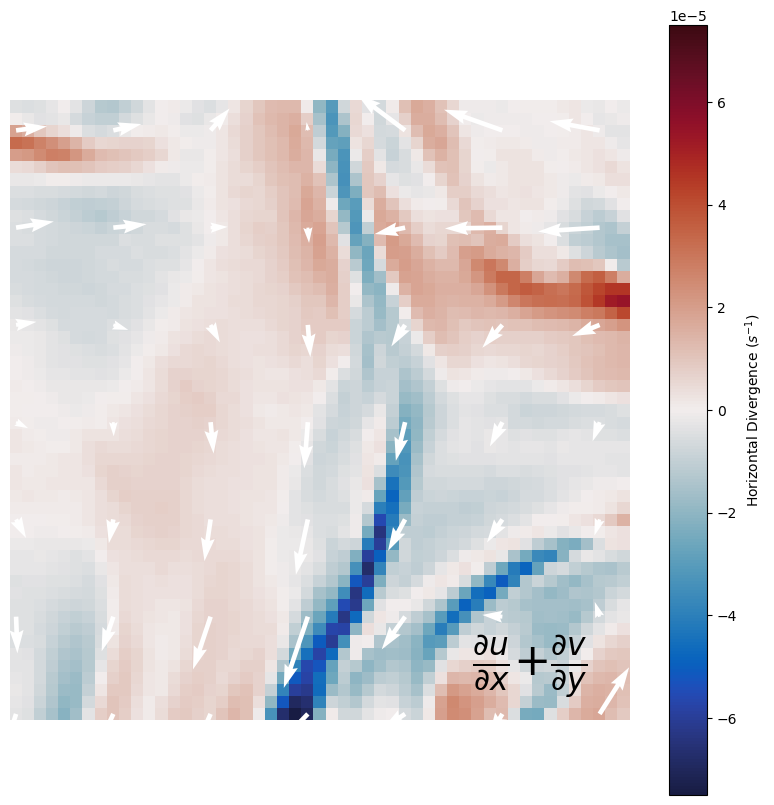

In [9]:
# Figure size
size = (10, 10)

# Color from cmocean
color = cmocean.cm.balance

# Defining the figure
fig = plt.figure(figsize=size)#, facecolor='w', edgecolor='k')
plt.tight_layout()
# Axes with Cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
plt.axis('off')

# and extent
#ax.set_extent([min_lon+0, max_lon, min_lat, max_lat], ccrs.PlateCarree())
#ds_data_clip.eta_rho.isel(time=11,z=0)
# Plotting using Matplotlib 
# We plot the temp at the surface at the final recorded time interval
X = ds_grd_clip.lon_u
Y = ds_grd_clip.lat_u
U = ds_data_clip.u.isel(ocean_time = 0, s_rho=49).values
V = ds_data_clip.v.isel(ocean_time = 0, s_rho=49).values


Ux, Uy = np.gradient(U)
Vx, Vy = np.gradient(V)

Ux = Ux
Uy = Uy
Vx = Vx
Vy = Vy
V = V
U = U
# cf = plt.pcolor(ds_grd.lon_u, ds_grd.lat_u, ds_data.u.isel(ocean_time=0,s_rho=49).values,transform=ccrs.PlateCarree(), 
#               cmap=color)#,vmin = 28, vmax = 30.5)#, add_colorbar=False)
cf = plt.pcolor(X, Y, -(Ux+Vy)/2000,transform=ccrs.PlateCarree(), 
              cmap=color, vmin = -.000075, vmax = .000075)#, add_colorbar=False)

# cf = plt.pcolor(ds_grd_clip.lon_rho, ds_grd_clip.lat_rho, ds_data_clip.temp.isel(ocean_time=0,s_rho=49).values, transform=ccrs.PlateCarree(),
#               cmap=color,vmin = 22.5, vmax = 26.5)#, add_colorbar=False),

# plt.colorbar(cf)
img = plt.savefig('../figures/test1.png', dpi = 200, bbox_inches='tight', pad_inches = 0)


# Defining the quiver plot
X = ds_grd_clip.lon_u
Y = ds_grd_clip.lat_u
U = ds_data_clip.u.isel(ocean_time = 0, s_rho=49)
V = ds_data_clip.v.isel(ocean_time = 0, s_rho=49)

step = 8
X_reduced = X[::step, ::step]
Y_reduced = Y[::step, ::step]
U_reduced = U[::step, ::step]
V_reduced = V[::step, ::step]


quiver = plt.quiver(X_reduced, Y_reduced, U_reduced, V_reduced, transform=ccrs.PlateCarree(),
                    scale=5, color = 'w')#transform=ccrs.PlateCarree()      

# Add Text

plt.text(129.75, 19.06, r'$\frac{\partial u}{\partial x} \plus  \frac{\partial v}{\partial y}$', fontsize = 32)


XYimg = plt.savefig('../figures/surfqplot1.png', dpi = 300, bbox_inches='tight', pad_inches = 0)
# Vector options declaration
veclength = 0.5
maxstr = '%3.1f m/s' % veclength

plt.colorbar(cf, label = r'Horizontal Divergence ($s^{-1}$)')

XY_colorbar_img = plt.savefig('../figures/surfplot_cb.png', dpi=300, bbox_inches='tight', pad_inches = 0.5)

plt.show()




# Create the Longitudinal Section Plot and save .png file

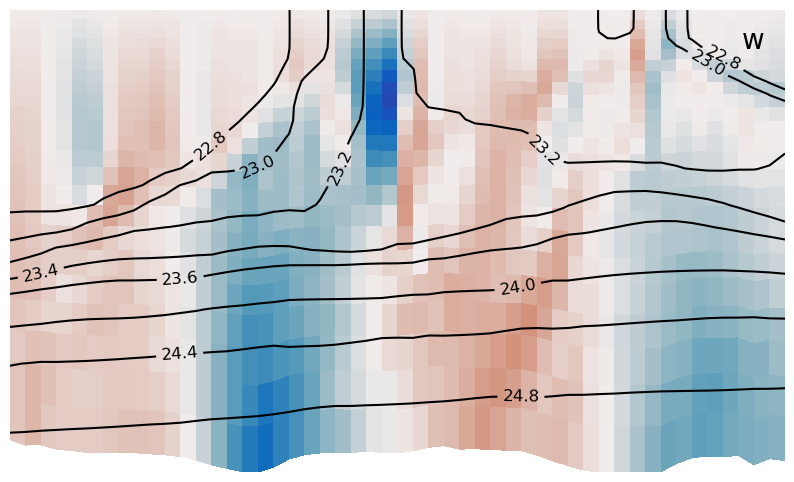

In [10]:
# Color from cmocean
colort = cmocean.cm.thermal
coloru = cmocean.cm.balance

ZZ1 = ds_grd_clip.z_rho.isel(eta_rho = np.min(ds_grd_clip.eta_rho))
XX = ds_grd_clip.lon_rho.sel(eta_rho = np.min(ds_grd_clip.eta_rho))
lon, dep1 = np.meshgrid(XX, ds_data_clip.s_rho)
WWW = ds_data_clip.w.isel(ocean_time = 0, eta_rho = np.min(ds_grd_clip.eta_rho))
VVV = ds_data_clip.v.isel(ocean_time = 0, eta_v = np.min(ds_grd_clip.eta_v))
TTT1 = ds_data_clip.temp.isel(ocean_time = 0, eta_rho = np.min(ds_grd_clip.eta_rho))

SSS1 = ds_data_clip.salt.isel(ocean_time = 0, eta_rho = np.min(ds_grd_clip.eta_rho))

sig0 = gsw.sigma0(SSS1,TTT1)
N2, pmid = gsw.Nsquared(SSS1,TTT1,ZZ1, lat = 20, axis=0)

plt.figure(figsize=(10,6))
plt.axis('off')

seclon = plt.pcolor(lon[25:-1,:], ZZ1[25:-1], WWW[27:-1,0:-1], cmap = coloru, vmin = -.002, vmax = .002)

levels1 = np.linspace(22.8, 23.4, 4)
levels2 = np.linspace(23.6, 24.8, 4)
contours1 = plt.contour(lon[25:-1,:], ZZ1[25:-1], sig0[25:-1,:], levels1, colors='k')
contours2 = plt.contour(lon[25:-1,:], ZZ1[25:-1], sig0[25:-1,:], levels2, colors='k')
# manual_loc1 = [(129.22, -50), (129.35,-75), (129.4, -100), (129.65, -245), (129.75, -75), (129.78, -40), (129.9, -30), (129.92, -60)]
manual_loc = [(129.22, -170), (129.65, -180), (129.22, -215), (129.65, -245)]
ca = plt.clabel(contours1, inline=True, inline_spacing = 5, fontsize=12)# 
cb = plt.clabel(contours2, inline=True, inline_spacing = 5, manual=manual_loc, fontsize=12)#, 
#[txt.set_bbox(dict(boxstyle='square,pad=0',fc='red')) for txt in cb]
#plt.colorbar(seclon)
# plt.xlabel('Latitude')
# plt.ylabel('Depth (m)')

plt.text(129.93, -30, 'w', fontsize = 20)

XZimg = plt.savefig('../figures/seclon.png', dpi = 300, bbox_inches='tight', pad_inches = 0)



# Create the Latitudinal Section Plot and save .png file

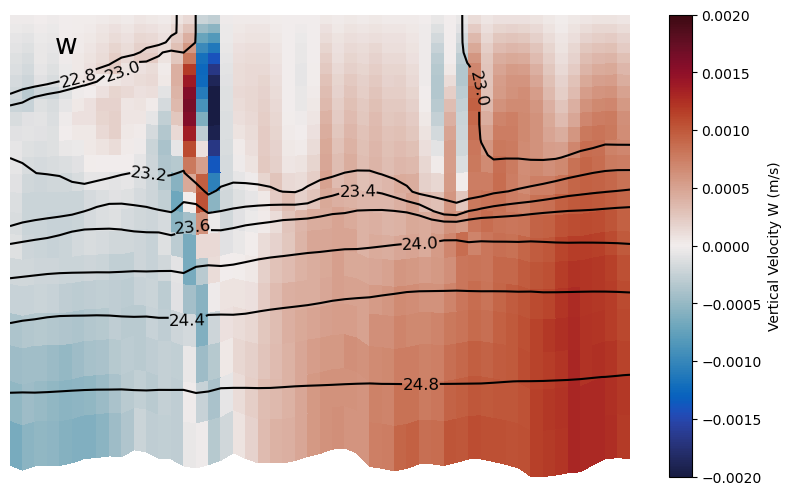

In [11]:
# Color from cmocean
colort = cmocean.cm.thermal
coloru = cmocean.cm.balance
ZZ = ds_grd_clip.z_rho.sel(xi_rho = np.max(ds_grd_clip.xi_rho))
YY = ds_grd_clip.lat_rho.sel(xi_rho = np.max(ds_grd_clip.xi_rho))
lat, dep = np.meshgrid(YY, ds_data_clip.s_rho)
TTT = ds_data_clip.temp.isel(ocean_time = 0, xi_rho = np.max(ds_grd_clip.xi_rho))
UUU = ds_data_clip.u.isel(ocean_time = 0, xi_u = np.max(ds_grd_clip.xi_u))
WWW = ds_data_clip.w.isel(ocean_time = 0, xi_rho = np.max(ds_grd_clip.xi_rho))
SSS = ds_data_clip.salt.isel(ocean_time = 0, xi_rho = np.max(ds_grd_clip.xi_rho))

sig0 = gsw.sigma0(SSS,TTT)
N2, pmid = gsw.Nsquared(SSS,TTT,ZZ, lat = 20, axis=0)

plt.figure(figsize=(10,6))
plt.axis('off')
seclat = plt.pcolor(lat[25:-1,:], ZZ[25:-1], WWW[27:-1,0:-1], cmap = coloru, vmin = -.002, vmax = .002)


levels1 = np.linspace(22.8, 23.4, 4)
levels2 = np.linspace(23.6, 24.8, 4)
contours1 = plt.contour(lat[25:-1,:], ZZ[25:-1], sig0[25:-1,:], levels1, colors='k')
contours2 = plt.contour(lat[25:-1,:], ZZ[25:-1], sig0[25:-1,:], levels2, colors='k')
manual_loc1 = [(19.1, -30), (19.20, -55), (19.22, -100), (19.55, -120), (19.75, -50)]
manual_loc2 = [(19.28, -120), (19.65, -150), (19.28, -180), (19.65, -245)]
plt.clabel(contours1, inline=True, inline_spacing = 5, manual = manual_loc1, fontsize=12)
plt.clabel(contours2, inline=True, inline_spacing = 5, manual = manual_loc2, fontsize=12)

plt.text(19.07, -30, 'w', fontsize = 20)


YZimg = plt.savefig('../figures/seclat.png', dpi=300, bbox_inches='tight', pad_inches = 0)

plt.colorbar(seclat, label = 'Vertical Velocity W (m/s)')

YZ_colorbar_img = plt.savefig('../figures/seclat_cb.png', dpi=300, bbox_inches='tight', pad_inches = 0.5)

plt.show()


# Build the waterfall plot

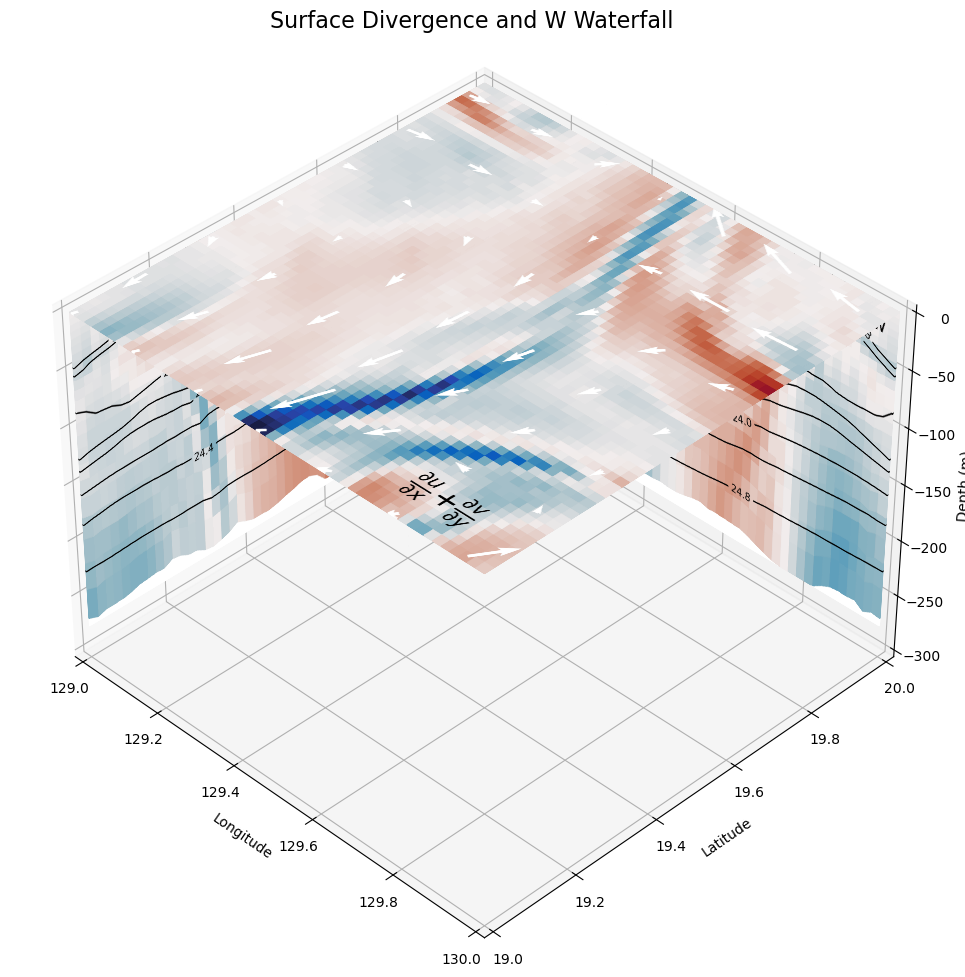

In [21]:

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection = '3d')

Ctest = image.imread('../figures/test1.png')
Cxy = image.imread('../figures/surfqplot1.png')
Cxz = image.imread('../figures/seclon.png')
Cyz = image.imread('../figures/seclat.png')

yp, xp, __ = Cxy.shape
zp, xp1, __ = Cxz.shape
zp, yp1, __ = Cyz.shape

x = np.linspace(min_lon, max_lon, xp)
y = np.linspace(min_lat, max_lat, yp)
Xy, Yx = np.meshgrid(x, y)
Z1 = np.zeros_like(Yx)

xz = np.linspace(min_lon, max_lon, xp1)
yz = np.linspace(min_lat, max_lat, yp1)
z = np.linspace(max_dep,0,zp)
Xz, Zx = np.meshgrid(xz, z)
Yz, Zy = np.meshgrid(yz, z)


# ax = fig.gca(projection='3d')
#ax.dist=6.2
ax.view_init(elev=38, azim=-45)

ax.plot_surface(Xy, Yx, Z1, facecolors=np.flipud(Cxy),
                rstride=2, cstride=2,
                antialiased=True, shade=False)

ax.plot_surface(Xz, np.min(Yz)*np.ones_like(Xz)-1, Zx, facecolors=np.flipud(Cxz),
                rstride=2, cstride=2,
                antialiased=True, shade=False)

ax.plot_surface(np.max(Xz)*np.ones_like(Yz)+1, Yz, Zy, facecolors=np.flipud(Cyz),
                rstride=2, cstride=2,
                antialiased=True, shade=False)

fig.colorbar(seclat, label = 'Temperature (C)')
#plt.rcParams['text.usetex'] = True
ax.set_xlim([min_lon,max_lon])
ax.set_ylim([min_lat,max_lat])
ax.set_zlim([np.round(max_dep,-2),0])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (m)')
ax.set_title('Surface Divergence and W Waterfall', fontsize=16)

WFimg = plt.savefig('../figures/Waterfall_div_w.png', dpi = 300)

plt.show()